**Fichier de test :**

- A partir d'un signal de parole bruité et d'un masque généré par notre modèle deep. Créer le signal de parole débruité.

In [15]:
from pathlib import Path
from mask import  compute_binary_mask, compute_soft_mask
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from modules import *
import pickle

In [16]:
class Param_stft():
    def __init__(self) -> None:
        self.n_fft = 2048
        self.n_window = 600
        self.hop_length = 256
        self.window = "hann"

In [17]:
snr = 10
model_name = "model_4.pth"
name = 980

In [18]:
generated_mask_path = Path.cwd() / "data" / "generated_mask" / model_name[:-4] / f"{snr}" /  f"{name}.pkl"
signal_and_noise_path = Path.cwd() / "data" / "noised_data" / f"{snr}" / f"{name}.flac"
# original_path = Path.cwd() / "data" / "raw_data_cut" / f'{name}.flac'
audio_raw_data_path = Path.cwd() / "data" / "raw_data_cut" / f"{name}.flac" 

param_stft = Param_stft()

**Obtention du mask pour le signal bruité - Test (A supprimer dès que generated_mask_path complet) :**

In [19]:
# audio_raw_data_path = Path.cwd() / "data" / "raw_data_cut" / "20.flac" 
# signal_and_noise = Path.cwd() / "data" / "noised_data" / "10" / "20.flac"
# noise_path =  Path.cwd() / "data" / "only_noise" / "20.flac"

In [20]:
#load the signal
# y_raw, sr = librosa.load(audio_raw_data_path, sr=None)
# display(Audio(y_raw, rate=sr))
# #load the signal + noise
# y_signal_noise, sr = librosa.load(signal_and_noise, sr=None)
# display(Audio(y_signal_noise, rate=sr))
# #load the noise
# y_noise, sr = librosa.load(noise_path, sr=None)
# display(Audio(y_noise, rate=sr))

In [21]:
# binary_mask = compute_binary_mask(y_raw, y_noise, param_stft)

**Obtention du signal débruité à partir du masque et du signal de parole propre :**

In [22]:
#Chargement du masque
with open(generated_mask_path, 'rb') as pickle_file:
    binary_mask = pickle.load(pickle_file)

#Application du masque
y_signal_noise, sr = librosa.load(signal_and_noise_path, sr=None)
stft_y_noised = librosa.stft(y_signal_noise, n_fft=param_stft.n_fft, hop_length=param_stft.hop_length, win_length=param_stft.n_window, window=param_stft.window)

# m = np.max(binary_mask)/2

# for i in range(binary_mask.shape[0]):
#     for j in range(binary_mask.shape[1]):
#         binary_mask[i, j] = 1 if binary_mask[i, j] > m else 0

signal_and_noise_with_mask = stft_y_noised * binary_mask

#Retour au signal temporel avec l'ISTFT
reconstructed_signal = librosa.istft(signal_and_noise_with_mask, n_fft=param_stft.n_fft, hop_length=param_stft.hop_length, win_length=param_stft.n_window, window=param_stft.window)


y_raw, sr = librosa.load(audio_raw_data_path, sr=None)


**Affichage des spectrogrammes des signaux propre, bruité et débruité**

/tmp/ipykernel_2887/1513788982.py:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(stft_y_raw, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')


<Figure size 640x480 with 0 Axes>

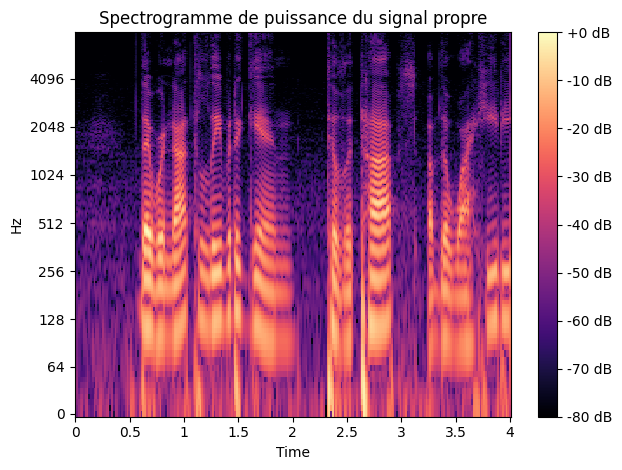

<Figure size 640x480 with 0 Axes>

In [23]:
# Calcul du spectrogramme du signal propre
stft_y_raw = librosa.stft(y_raw, n_fft=param_stft.n_fft, hop_length=param_stft.hop_length, win_length=param_stft.n_window, window=param_stft.window)

# Affichage du spectrogramme du signal propre
plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(stft_y_raw, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme de puissance du signal propre')
plt.tight_layout()
plt.figure()

<Figure size 640x480 with 0 Axes>

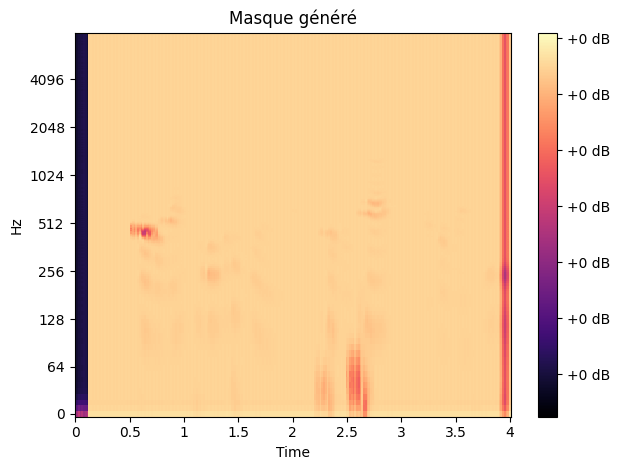

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure()
librosa.display.specshow(binary_mask, sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Masque généré')
plt.tight_layout()
plt.figure()

/tmp/ipykernel_2887/2407408645.py:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(stft_y_noised, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')


<Figure size 640x480 with 0 Axes>

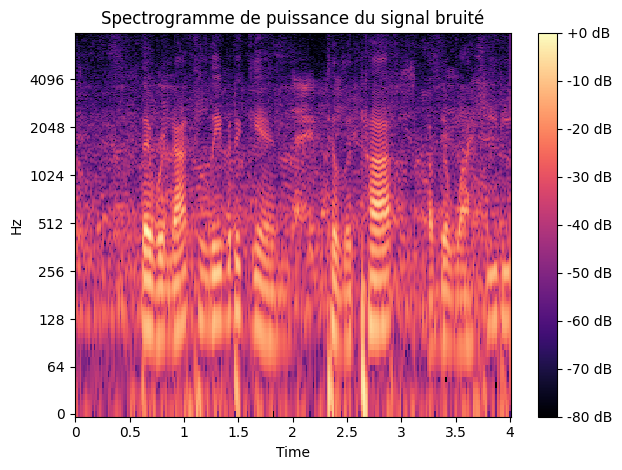

<Figure size 640x480 with 0 Axes>

In [25]:
# Affichage du spectrogramme du signal bruité
plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(stft_y_noised, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme de puissance du signal bruité')
plt.tight_layout()
plt.figure()

/tmp/ipykernel_2887/712146227.py:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(signal_and_noise_with_mask, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')


<Figure size 640x480 with 0 Axes>

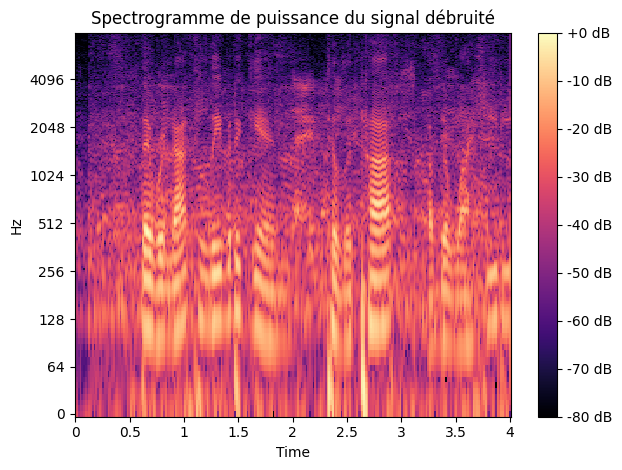

<Figure size 640x480 with 0 Axes>

In [26]:
# Affichage du spectrogramme du signal débruité
plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(signal_and_noise_with_mask, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme de puissance du signal débruité')
plt.tight_layout()
plt.figure()

**Caclul du gain :**

In [27]:
SNR_in_raw = SNRin_dB(y_raw, y_signal_noise)

SDR_out_noised = SDRout_dB(y_raw, reconstructed_signal)

gain = gain(SNR_in_raw, SDR_out_noised)

print(f"gain : {gain} dB")

gain : 4.061963070977582 dB


In [28]:
display(Audio(y_raw, rate=sr))
display(Audio(y_signal_noise, rate=sr))
display(Audio(reconstructed_signal, rate=sr))